# K Means Clustering


## Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create Some Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

## Visualize Data

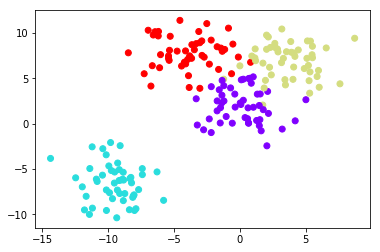

In [4]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(n_clusters=4)

In [7]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
# get the centers of clusters
kmeans.cluster_centers_

array([[-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [ 3.71749226,  7.01388735]])

In [9]:
# get the cluster labels
kmeans.labels_

array([0, 3, 2, 3, 3, 1, 3, 2, 3, 2, 0, 2, 3, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       2, 1, 0, 1, 1, 2, 3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0,
       2, 3, 0, 2, 1, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 3, 1, 3, 1, 0, 3, 2,
       1, 3, 3, 1, 3, 2, 1, 2, 1, 3, 3, 2, 0, 2, 2, 1, 3, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 2, 1, 3, 0, 1, 3, 2, 1, 2, 2, 3, 2, 1, 3, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 0, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 0, 3, 2, 1, 3, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 3, 3, 2, 3, 2, 2, 0, 1, 0, 2, 3, 0, 2, 3, 2, 0, 3, 2, 0,
       3, 3, 1, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 3, 0, 1, 2, 3, 3,
       1, 2], dtype=int32)

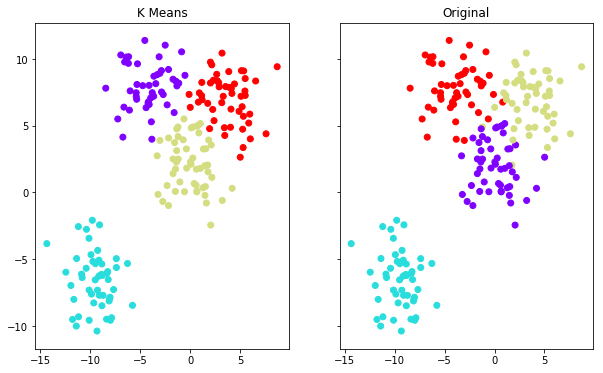

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

You should note, the colors are meaningless in reference between the two plots.

When you zoom in, you will see some of the samples are clustered differently from the original cluster labels.

## How about we cluster the data into two clusters?

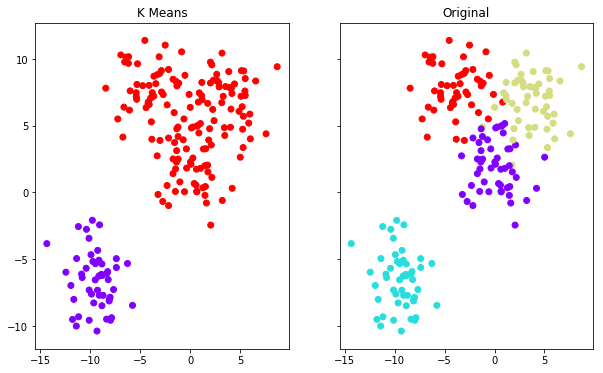

In [11]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data[0])
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

 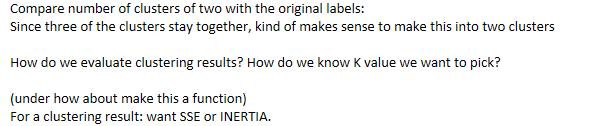

## How about make this a function?

Sum of squared error (SSE), also known as **Inertia**.

Create a function kmeans_sse which:
- takes an integer for the number of clusters a parameter, a data object for the dataset (you can assume it is the same data type as we are using in this lecture)
- use Kmeans to cluster all the samples
- plot the clusters with cmap 'rainbow'
- returns the SSE of the current clustering as a float.

In [12]:

#Cool way to get euclidean distance: nplinalg.norm(a-b)
#Other persons code, want to see how it works. 

# Euclidean Distance Caculator
def dist(a, b):
    return np.linalg.norm(a-b)

# create two points (as np arrays)
point1 = np.array((1,1)) #Point 1: xy coordinates (1,1)
point2 = np.array((2,2)) #Point 2: xy (2,2)

# output the distance sqrt((2-1)**2 + (2-1)**2)
print(dist(point1,point2))

#Results: yes, this works. 

1.4142135623730951


In [13]:
#Create a function called kmeans_sse: take a number as k value, cluster them on that number, then will get the SSE for each K

def kmeans_sse(num_clusters, dataset): #Take number of clusters and the dataset. 
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(dataset[0]) #Get kmeans model, fit it. 
    
    plt.scatter(dataset[0][:,0],dataset[0][:,1],c=kmeans.labels_,cmap='rainbow')
    
    plt.title('K Means (k='+str(num_clusters)+')')
    
    total_sse =0
    # size is divided by 2 because we have 200 samples, but since they have 2-D features,
    # the size of dataset[0] is 400
    for i in range(dataset[0].size//2): #//2: original dataset have 4 clusters with 50 samples (200 samples)- but get size get 400, so have to diveide
        sample_xy_coordinates = dataset[0][i]
        predicted_cluster_label = kmeans.labels_[i]
        centroid_xy_coordinates = kmeans.cluster_centers_[predicted_cluster_label]
        total_sse = total_sse +  (dist(sample_xy_coordinates, centroid_xy_coordinates))**2 #Had to **2 to get squared value (because used euclidean distance)
        #Calculate distance for each sample and centroid, add up to get total SSE
    return total_sse

### Some gotchas in the code above:
- the size of dataset[0] is 400, but we generated only 200 samples...
    - here is the reason:

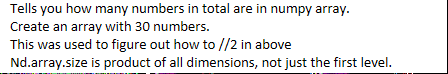

In [14]:
# create a 3-D array with numpy
x = np.zeros((3, 5, 2))
print(x)
print(type(x))
# there are a total of 30 numbers in the ndarray, so the size is 30!
x.size #Nd.array.size is product of all dimensions, not just the first level. 

[[[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]
  [0. 0.]]]
<class 'numpy.ndarray'>


30

- so we have divide the dataset[0] by 2
    - but it has to be a floor division...
    - because range() expects an integer

In [15]:
# another approach to get 3:
x.shape[0]

3

610.6147253004683


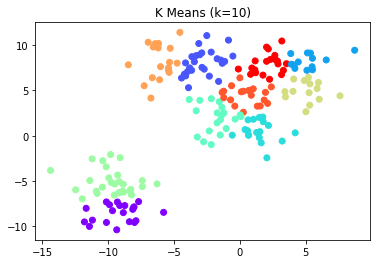

In [16]:
# call the function with 10 clusters, also, check the SSE
total_sse_10 = kmeans_sse(10, data)
print(total_sse_10)

559.466866281189


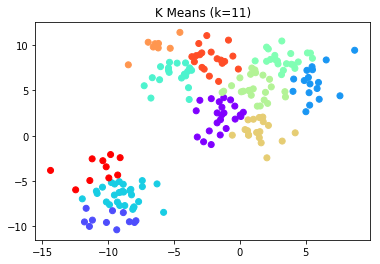

In [17]:
# call the function with 11 clusters, also, check the SSE
total_sse_11 = kmeans_sse(11, data)
print(total_sse_11)

### Discuss:

We see a drop on the SSE from 10 clusters to 11 clusters, what does this mean? Does this mean that it is better to have 10 clusters than 11 clusters?



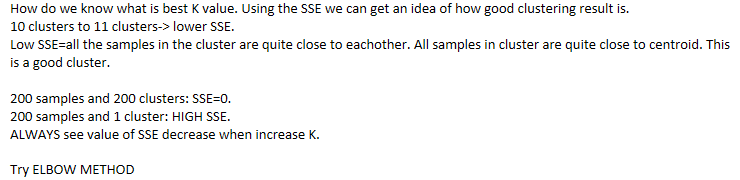

We should choose a *K* value where you will not get that much more information by increasing the number of clusters.
- in other words, you want to choose a *K* that if you increase it, the SSE will not decrease too much further

There is no "correct" K value
- use domain experience or domain knowledge in the field you are working with

# Elbow method

We know that we created this dataset with 4 clusters. Let's do an Elbow method to see if it also suggest the same number of clusters.

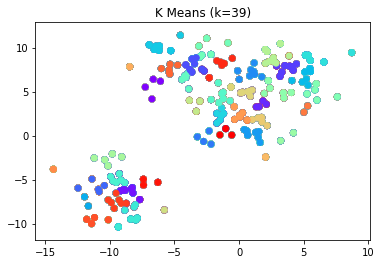

In [18]:
sse = [] #list of SSE

# Will take some time
for i in range(1,40): #try all K from 1 to 40
    # call the function we just created, with i as parameter
    current_sse = kmeans_sse(i, data)
    sse.append(current_sse) #then append the list

# jupyter only shows the last figure, which is n=39    

Text(0,0.5,'Sum of squared error')

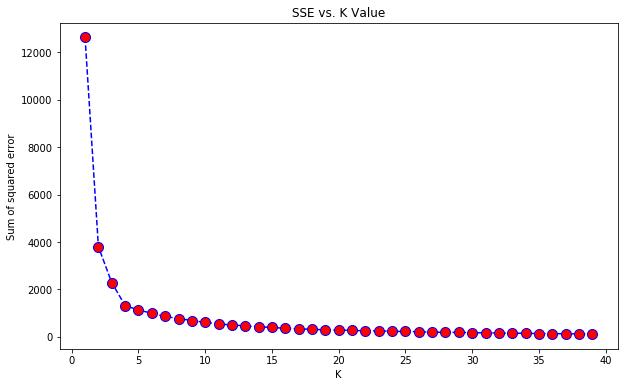

In [19]:
plt.figure(figsize=(10,6))
# use 1-40 as x axis ans error_rate as y axis
plt.plot(range(1,40),sse,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('SSE vs. K Value')
plt.xlabel('K')
plt.ylabel('Sum of squared error')

. 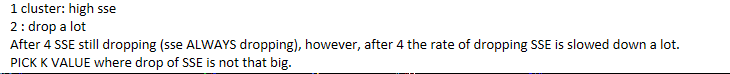

- A good clustering has tight clusters (so low inertia/SSE)
- ... but not too many clusters!

### Using a Kmeans model to predict

In [20]:
from sklearn.datasets import load_iris
data = load_iris()
samples = data.data
target = data.target

kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)

labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [21]:
# or, you can use the "predict" function, you should get the same labels!
labels = kmeans.predict(samples)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

### One big problem with Kmeans...

Let's try to load the A-2 dataset with 35 clusters: https://cs.joensuu.fi/sipu/datasets/

In [22]:
#load the data
import pandas as pd
df = pd.read_csv("datasets/a2.txt", names = ['x','y'])
df.head()

,x,y
0,53920,42968
1,52019,42206
2,52570,42476
3,54220,42081
4,54268,43420


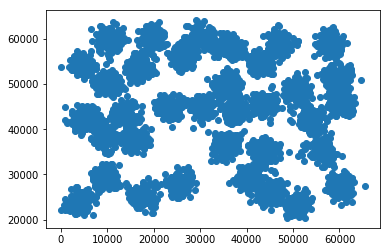

In [23]:
# visualize the data
plt.scatter(df['x'],df['y'])

In [24]:
# note that the scales of x and y axixes are not the same.
# let's scale the features! 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)

/opt/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [25]:
# create the fit the kmeans model
kmeans = KMeans(n_clusters=35,random_state=42)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=35, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [26]:
# get the labels from the kmeans model
labels = kmeans.labels_
# check the size (should be 5250)
labels.size

5250

In [27]:
df

array([[ 1.19923181, -0.05289239],
       [ 1.0935589 , -0.11750749],
       [ 1.12418792, -0.09461238],
       ...,
       [-0.48369678, -1.37487337],
       [-0.41604611, -1.23648511],
       [-0.18329889, -1.31246298]])

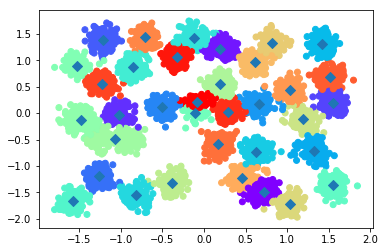

In [28]:
plt.scatter(df[:,0],df[:,1],c=labels,cmap='rainbow')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='D',s=50)

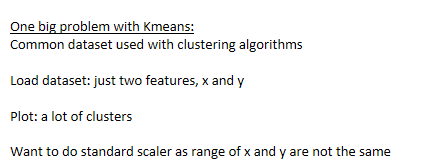

#### Discuss: what's wrong with the clustering results?



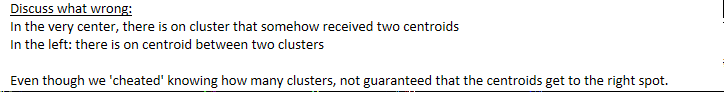

### Complexity
Finding optimal solution to the k-means clustering problem for observations is NP-hard.

Running the algorithm discussed in our lecture notes is O(mkdi), where m is the number of d-dimensional vectors (samples), 
k the number of clusters and i the number of iterations needed until convergence. On data that does have a clustering structure, the number of iterations until convergence is often small, and results only improve slightly after the first dozen iterations. So Kmeans algorithm is therefore often considered to be of **"linear" complexity** in practice.

#### Discuss: what if *m* is too large?

One approach to making the k-means method more efficient on large data sets is to use a good-sized set of samples in clustering.


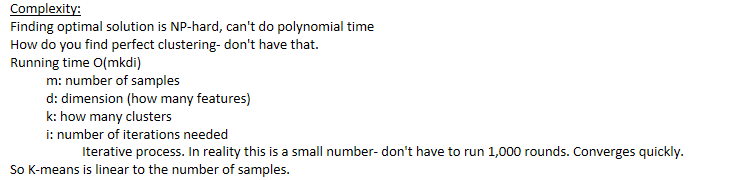

#### Discuss: what if you have a dataset with a mixed of valued attributes (height and weight) and nominal attributes (e.g., hobbies as strings)? can we still use Kmeans?

What if M is large?
	A lot of algorithms struggle with this. Kmeans does ok with this. 
	SVM: struggles a lot with large dataset. 
	Kmeans- if dataset it very large, can sample part of the data for clustering instead of using it all. 
	
Mixed dataset: 
	Have a dataset of employees 
	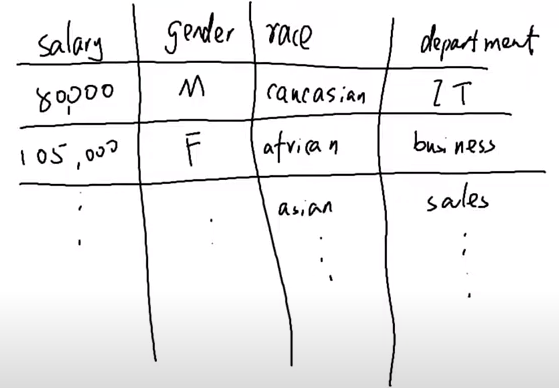
	For the numerical features we just keep that (salary)
	For gender: apply one hot encoder or true/false. 
	For Race: one hot encoder
	Department: one hot encoder
	
	Process this data- salary as one column, gender with one column as 1 or 0, new column for each race, new column for each department. Now that it is processed can you still use Kmeans?
		Kmeans relies on distance measurements. Need meaningful distance measure (can be euclidean, manhattan) but that must be meaningful. 
		
		Is the distances meaningful in this preprocessed data (one hot encoded of above):
			PROBABLY NOT that valid anymore. Because if you have two workers in same department and earning the same salary but they are of different races - how do you measure distance? Hard. 
			If you cannot come up with valid distance measures then Kmeans not that useful. 
			


# To sum up

- SSE can be used to evaluate the quality of clustering
- elbow method
    - choose k at which the SSE no longer decreases abruptly
- Kmeans does not always give the best clustering resuslts
- Kmeans has linear time complexity
    - if you have big number of data, sample them first
- Kmeans relies on the a valid measure of distance, be careful when you are dealing with a mix of valued and nominal attributes.


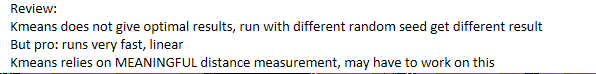